In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Parametric Morse Theory 

In [2]:
import sys
sys.path.append("../src")
import networkx as nx
import numpy as np
import gudhi as gd
import numpy as np

from helpers import build_morse_function, stochastic_block_model
from discrete.core import critical_cells, is_morse_type, hasse_diagram, gradient
from parametric.core import parametric_pipeline, abstract_diagram, parametric_coordinates
from visualization import plot_PD, plotly_persistence_diagram

## First part : discrete Morse theory

First of all, we run the example of the paper <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

#### Initialization of the simplicial complex $K$
We build a simplicial complex $K$ by storing its edges (and nodes), and adding clique completion up to dimension 2, <i>i.e.</i> we complete all triangles. Then, we define a label function $g:K^{(0)}\rightarrow \mathbb{R}$ on the nodes of $K$ (where $K^{(0)}$ denotes the $0$-skeleton of $K$, <i>i.e.</i> its nodes).

In [155]:
K = gd.SimplexTree()

edges = [[0,1],[7,0],[1,7],[1,2],[2,3],[4,2],[2,5],[3,4],[5,7],[6,7],[7,8]]

for e in edges:
    K.insert(e)
K.expansion(2)

d = 2

g = {"[0]": 3.1,
     "[1]": 2.1,
     "[2]": 1.1,
     "[3]": 3.2,
     "[4]": 3.3,
     "[5]": 3.4,
     "[6]": 4.1,
     "[7]": 0.1,
     "[8]": 4.3
     }

#### Generating a discrete Morse function f on K
The next step is to extend the label function $g:K^{(0)}\rightarrow \mathbb{R}$ to a discrete Morse function $f:K\rightarrow \mathbb{R}$ (as introduced by R. Forman), via the algorithm designed in the paper mentioned above, called <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

In [156]:
f = build_morse_function(K, d, g, 0.05)['f']

In [158]:
f

{'[0]': 3.1,
 '[1]': 2.1,
 '[2]': 1.1,
 '[3]': 3.2,
 '[4]': 3.3,
 '[5]': 3.4,
 '[6]': 4.1,
 '[7]': 0.1,
 '[8]': 4.3,
 '[0, 1]': 2.6,
 '[0, 7]': 3.111385320482928,
 '[1, 2]': 1.6,
 '[1, 7]': 2.134435047917405,
 '[2, 3]': 2.1500000000000004,
 '[2, 4]': 2.2,
 '[2, 5]': 2.25,
 '[3, 4]': 3.3036830062583222,
 '[5, 7]': 3.4008660910922353,
 '[6, 7]': 2.0999999999999996,
 '[7, 8]': 2.1999999999999997,
 '[0, 1, 7]': 2.855692660241464,
 '[2, 3, 4]': 2.751841503129161}

#### Checking if the above function on K is indeed a discrete Morse function
We implemented a function called ```check_Morse()``` designed to check whether, for a given pair $(K,f)$, the function $f:K\rightarrow \mathbb{R}$ is indeed a discrete Morse function on $K$. Concretely speaking, the function simply checks whether the axioms in the definition of discrete Morse function are satisfied.

In [159]:
is_morse_type(K, f)

True

### Printing down the critical cells
The function ```critical_cells(K,f)``` returns the list of all critical cells of the pair $(K,f)$, given in order of increasing dimension. In this example, we obtain two $0$-critical cells (nodes $2$ and $7$) and two $1$-critical cells (edges $(1,7)$ and $(5,7)$).

In [160]:
critical_cells(K, f)

[[2], [7], [1, 7], [5, 7]]

#### Printing down the gradient vector field V of (K,f)
The function ```gradient(K,f)``` returns the gradient vector field $V$ of $(K,f)$, as a list of pairs of regular (non-critical) cells, interpreted as arrows.

In [162]:
V = gradient(K, f)

In [163]:
V

[[[0, 7], [0, 1, 7]],
 [[0], [0, 1]],
 [[1], [1, 2]],
 [[3, 4], [2, 3, 4]],
 [[3], [2, 3]],
 [[4], [2, 4]],
 [[5], [2, 5]],
 [[6], [6, 7]],
 [[8], [7, 8]]]

#### Drawing the Hasse diagram of (K,f,V)
The Hasse diagram of the pair $(K,V)$ consists of a graph built in the following way. Its vertices are all cells of $K$. Then, directed edges are added from any cell to its codimension-$1$ faces. Finally, all edges (in an undirected way) that belong to the gradient vector field $V$ are reversed. The function ```hasse_diagram(K,V)``` uses the ```networkX``` library to plot the Hasse diagram of our example.

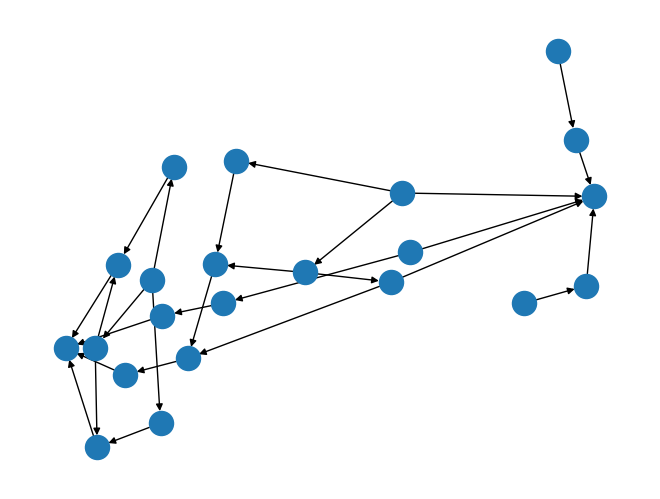

In [164]:
H = hasse_diagram(K, V)
nx.draw(H)

## Second part : parametric Morse theory

### The circle in eight vertices

In this first part, we run the example of the triangulated circle introduced in the paper <i>Parametric Morse Theory</i> (cf. "A simple example" page 8).

In [165]:
S = nx.Graph()
for i in range(1,8):
    S.add_node(i)
    S.add_edge(i,i+1)
S.add_edge(1,8)

K = gd.SimplexTree()
edges = S.edges
for e in edges:
    K.insert(list(e))

C = [[[5],[1,2]],
     [[7],[4,5]],
     [[5],[7],[5,6],[1,2]],
     [[1],[5],[3,4],[7,8]],
     [[8],[5,6]],
     [[4],[7,8]],
     [[1],[6],[2,3],[7,8]],
     [[5],[4,5]]]

V = []

V.append([[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[5],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[7],[7,8]],[[6],[6,7]],[[5],[4,5]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[5],[4,5]],[[3],[3,4]],[[2],[2,3]],[[1],[1,2]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[5],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])

In [168]:
G = abstract_diagram(K,V,C)

In [169]:
colors = ['orange', 'skyblue', 'red', 'greenyellow', 'violet', 'cyan', 'peru', 'crimson']
color_map = []

for node in G:
        
    for i in range(8):
        
        if G.nodes[node]['index'][1]==i:
            color_map.append(colors[i])

In [170]:
labeldict = {}
for node in G.nodes:
    labeldict[node] = str(G.nodes[node]['index'][0])

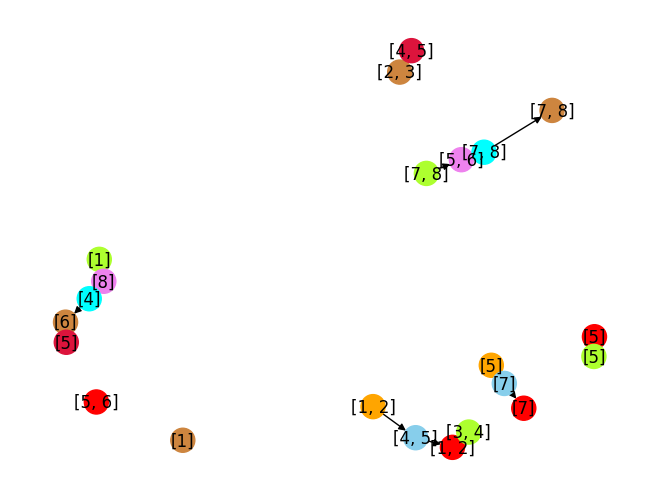

In [171]:
nx.draw(G, node_color=color_map, labels=labeldict, with_labels=True)

In [172]:
p = parametric_coordinates(K,V,C)

In [177]:
x = [life[0] for life in p[0]]
y = [life[1] for life in p[0]]
d = np.linspace(0,10,1000)

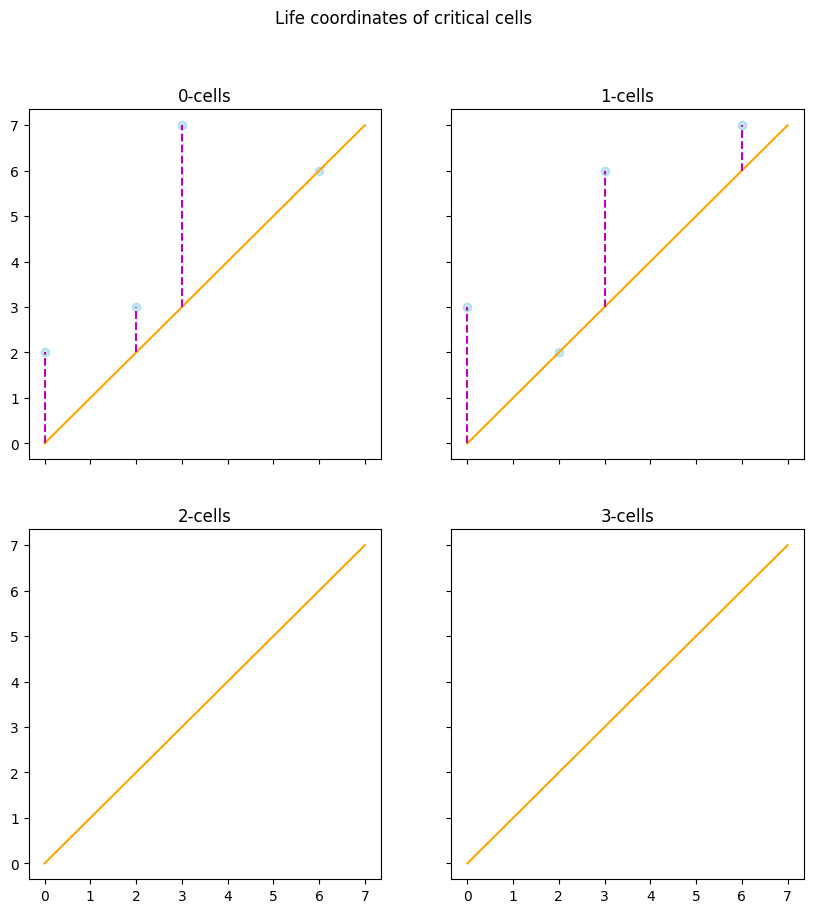

In [178]:
plot_PD(p[1])

### Running the whole pipeline

We define the sampling process parameters.

In [192]:
g1 = lambda x: np.cos(2*x)
g2 = lambda x: np.sin(3*x)
g3 = lambda x: 4 * np.cos(x)
g4 = lambda x: (np.sin(x))**2
g5 = lambda x: np.cos(x)
g6 = lambda x: np.sin(2*x)

In [193]:
functions = [g1, g2, g3, g4, g5, g, g, g]
start = 0
count = 8
time_step = 5
noise = 0.05
pert_count = 20
perturbation = 0.001

In [194]:
P = parametric_pipeline(S, functions = [g1,g1,g1,g1,g2,g2,g2,g2], start = 0, time_step = 0.05, count = 12, noise=0.05)

In [195]:
P[1]

[[[1], 0, 11],
 [[2], 0, 11],
 [[3], 0, 11],
 [[4], 0, 11],
 [[6], 0, 11],
 [[7], 0, 11],
 [[1, 2], 0, 11],
 [[2, 3], 0, 11],
 [[3, 4], 0, 11],
 [[5, 6], 0, 11],
 [[6, 7], 0, 11],
 [[7, 8], 0, 11]]

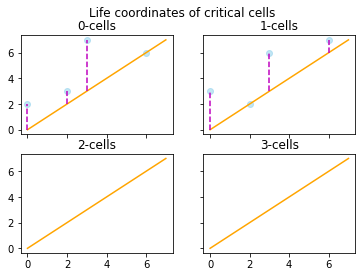

In [783]:
plot_PD(p[1])

### The tetrahedron

In [784]:
T = nx.Graph()
for i in range(1,3):
    T.add_node(i)
    T.add_edge(i,i+1)
T.add_edge(1,3)
T.add_node(4)
T.add_edges_from([(1,4), (2,4), (3,4)])

In [785]:
p_tetra = parametric_pipeline(T, functions = [g,g,g,g], start = 0, time_step = 0.05, count = 12, noise=0.05)

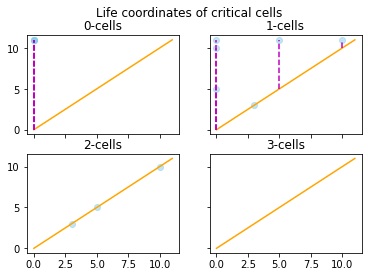

In [786]:
plot_PD(p_tetra[1])

### The circle as a triangle

In [790]:
circle = nx.Graph()
circle.add_edge(1,2)
circle.add_edge(2,3)
circle.add_edge(3,1)

In [791]:
p_circle = parametric_pipeline(circle, functions = [g,g2,g3], start = 0, time_step = 0.05, count = 12, noise=0.05)

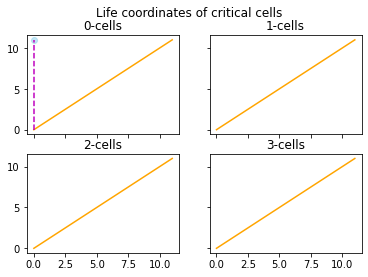

In [792]:
plot_PD(p_circle[1])

### The stochastic block model

In [189]:
stoch = stochastic_block_model(n=24, p=0.8, q=0.05, k=4)

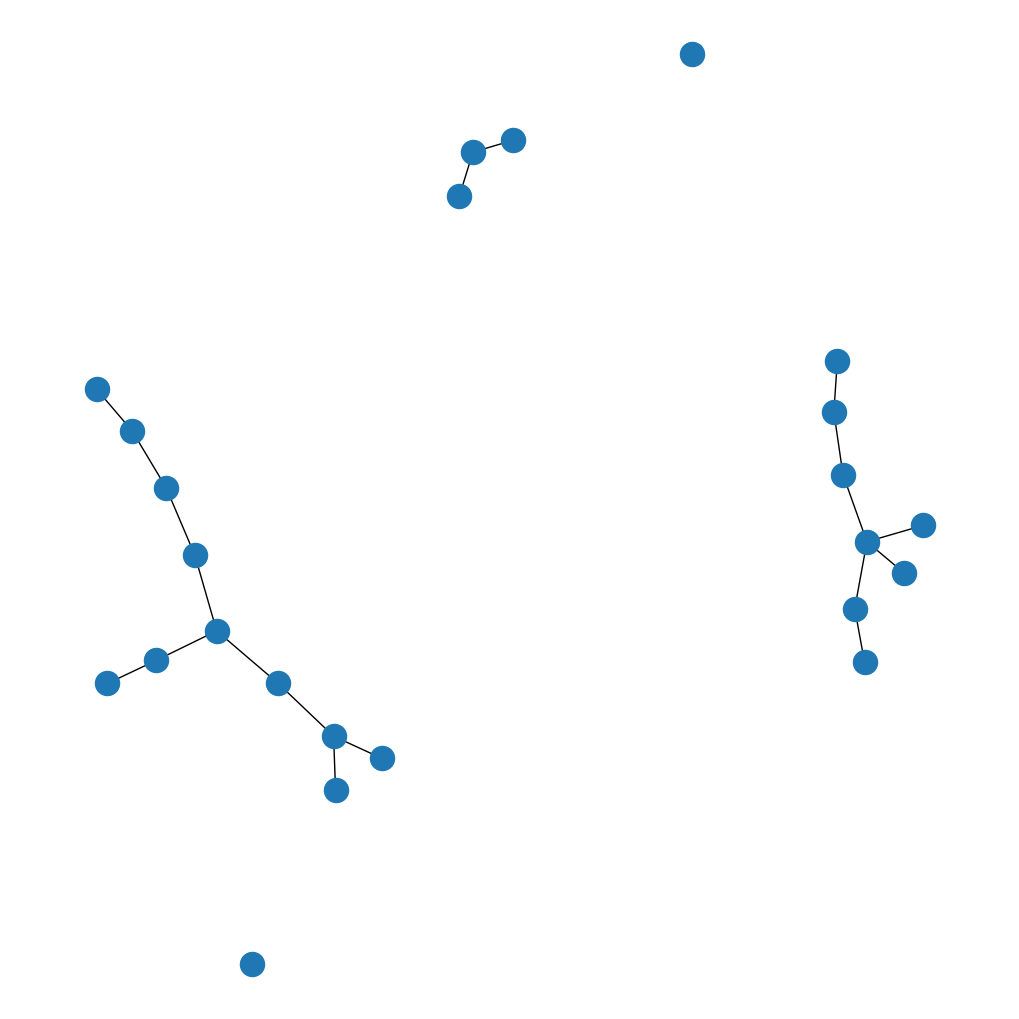

In [190]:
nx.draw(stoch)

In [207]:
p_stoch = parametric_pipeline(G=stoch,
                              functions=[g1,g2,g3,g4,g5,g6,g1,g2,g3,g4,g5,g6,g1,g2,g3,g4,g5,g6,g1,g2,g3,g4,g5,g6,],
                              start=0,
                              time_step=0.05,
                              count=12,
                              noise=0.05)

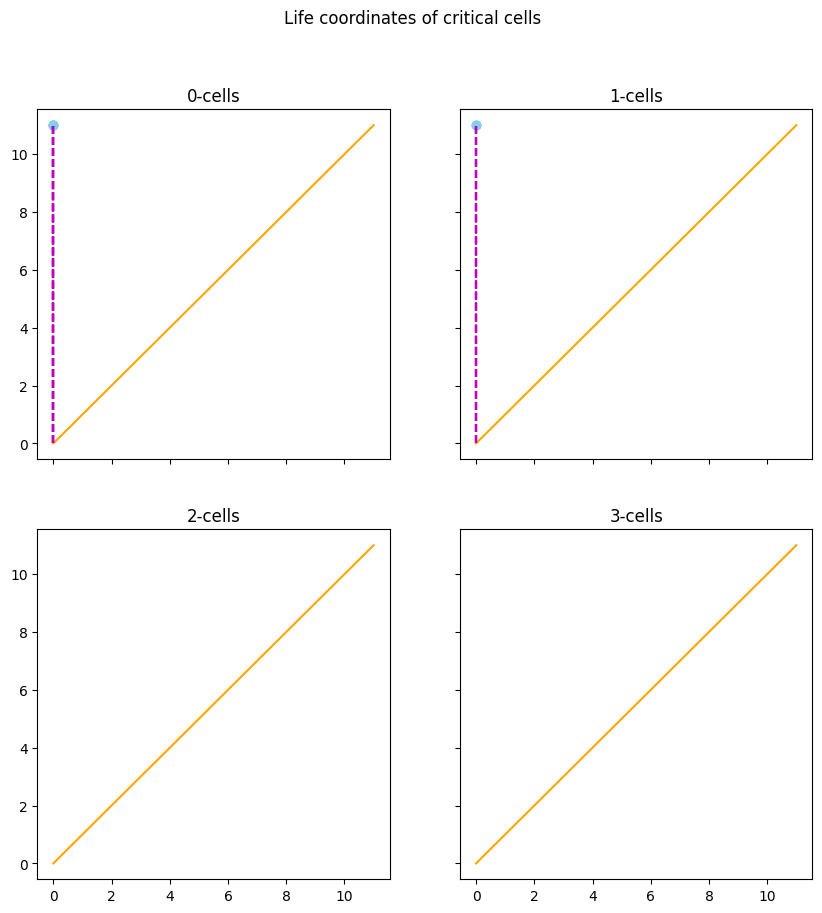

In [208]:
plot_PD(p_stoch[1])